<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad4/Practica_4_Segmentaci%C3%B3n_de_prestatarios_con_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 4

### Practica 4: **Segmentación de prestatarios con K-Means**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

## **Segmentación de prestatarios con K-Means**

**Objetivo:**  

Agrupar prestatarios de acuerdo con su capacidad financiera y condiciones del préstamo.

### **Cargar librerías y dataset lending club**

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

prestamos_df = pd.read_csv("prestamos_ok.csv")
prestamos_df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid,loan_term_year,purpose_code,home_ownership_code,grade_code,addr_state_code
0,0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,Cash,N,NaN,2011,1,3,11,4,2,2
1,1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,Cash,N,NaN,2011,1,3,9,4,2,0
2,2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,...,Cash,N,NaN,2011,1,3,0,4,4,0
3,3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,...,Cash,N,NaN,2011,0,5,11,3,5,0
4,4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,...,Cash,N,NaN,2011,0,5,9,4,1,5


### **Selección de variables financieras relevantes**

Para segmentar a los prestatarios del dataset Lending Club según su capacidad financiera y condiciones del préstamo, se seleccionaron variables directamente relacionadas con el riesgo crediticio y el comportamiento financiero del solicitante, tales como: monto financiado, tasa de interés, ingresos anuales, razón deuda/ingreso (DTI), utilización del crédito, calificación crediticia y propósito del préstamo codificado.


In [53]:
# --- Seleccionamos las variables financieras relevantes para segmentacion ---
# --- de acuerdo con su capacidad financiera y condiciones del préstamo ------
features = [
    'funded_amnt',     # monto financiado
    'int_rate',        # tasa de interés
    'annual_inc',      # ingreso anual
    'dti',             # ratio deuda/ingreso
    'revol_util',      # utilización del crédito
    'grade_code',      # calificación crediticia numérica
    'purpose_code'     # propósito del préstamo (codificado)
]

data = prestamos_df[features].dropna()
data.head()

,funded_amnt,int_rate,annual_inc,dti,revol_util,grade_code,purpose_code
0,2400,15.96,12252.0,8.72,98.5,2,11
1,10000,13.49,49200.0,20.00,21.0,2,9
2,3000,18.64,48000.0,5.35,87.5,4,0
3,5600,21.28,40000.0,5.55,32.6,5,11
4,5375,12.69,15000.0,18.08,36.5,1,9


### **Escalamiento de las variables**

Dado que estas variables se encuentran en escalas diferentes, se aplicó un escalamiento estándar (StandardScaler) con el fin de normalizar su distribución y evitar que variables de mayor magnitud dominen al algoritmo.


In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

### **Determinamos el número óptimo de clústeres (método del codo)**

**1. Eligir cuántos grupos quieres (k)**. Por ejemplo, si quieres 3 grupos, el algoritmo intentará dividir los datos en 3 clusters.  
**2. Colocar puntos iniciales (centroides)**. Son como “centros” provisionales de cada grupo.  
**3. Asignar cada dato al centro más cercano**. Se clcula la distancia (normalmente euclidiana) y cada punto se va al cluster cuyo centro esté más cerca.  
**4. Recalcular los centros**. Para cada grupo, el centro se mueve al promedio de todos los puntos que tiene.  
**5. Repetir**. Vuelve a asignar puntos y recalcular centros hasta que los grupos ya no cambien mucho (convergencia).  

**Idea clave:**  
K-Means agrupa datos minimizando la distancia dentro de cada grupo. Los clusters son “compactos” y separados entre sí.

**El método del codo (Elbow Method) es una técnica muy usada para determinar el número óptimo de clústeres en K-Means.**

1. Entrena K-Means con diferentes valores de *k*
    * Por ejemplo, prueba k = 1,2,3,…,10
2. Calcula la suma de errores cuadráticos (SSE o Inertia)
    * SSE = suma de las distancias al cuadrado entre cada punto y su centroide.
    * A medida que aumenta *k*, SSE disminuye porque los clusters son más pequeños.
3. Grafica SSE vs. número de clusters (k)
    * El gráfico muestra una curva decreciente.
    * Al inicio, la reducción de SSE es grande, pero después se vuelve marginal.
4. Identifica el “codo” de la curva
    * El punto donde la mejora empieza a ser mínima, **ese *k* es el número óptimo de clusters**.


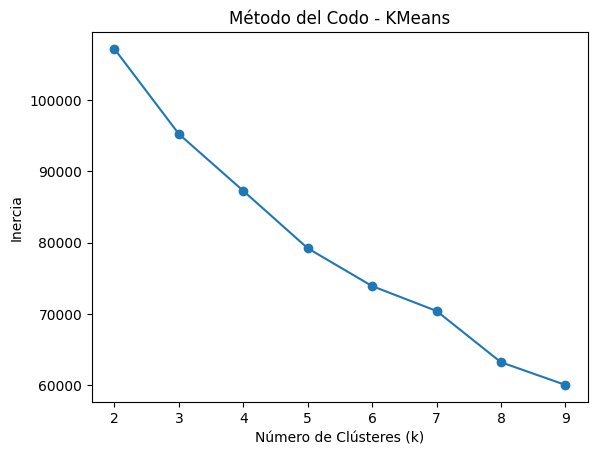

In [55]:
# --- Determinamos el número óptimo de clústeres (método del codo) ---
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Método del Codo - KMeans")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia")
plt.show()

## **K-Means con 3 Clusters**

se aplicó el algoritmo K-Means con k = 3, para obtener  tres grupos distintos de prestatarios.

In [75]:
# --- Aplicamos K-Means con el k elegido (por ejemplo, 3) ---
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data["cluster"] = clusters

## **Visualizacion de datos**

* Para analizar visualmente la separación entre clusters, se realizó un Análisis de Componentes Principales (PCA) reduciendo los datos a dos dimensiones.
* Los resultados muestran una separación razonable entre los clusters, lo que sugiere que las variables seleccionadas aportan información útil para la segmentación.

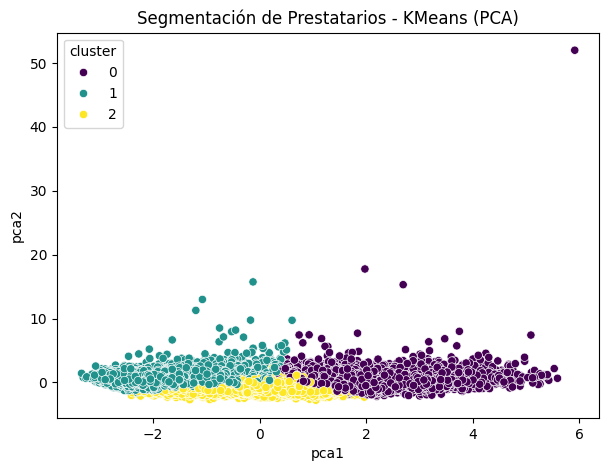

In [76]:
# --- Visualización PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data["pca1"], data["pca2"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="pca1", y="pca2", hue="cluster", palette="viridis")
plt.title("Segmentación de Prestatarios - KMeans (PCA)")
plt.show()

## **Agregar el centroide**

En **K-Means**, cada clúster se representa por un punto especial llamado **centroide**.

**El centroide es el “centro” del clúster**, calculado como el promedio de todas las observaciones que pertenecen a ese clúster (pero en el espacio de todas las variables). Es útil porque:
* Resume el perfil típico de cada clúster.
* Se usa para asignar nuevas observaciones al clúster correspondiente.
* Permite visualizar los clústeres en PCA.
* Mide qué tan compacto es cada grupo (inercia).
* Facilita interpretar y describir los segmentos en un análisis de negocios.








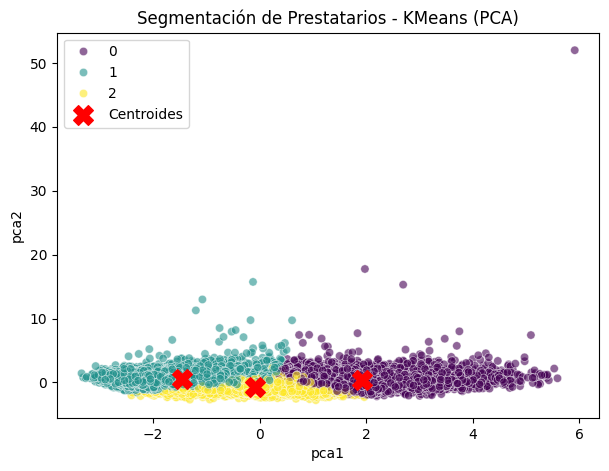

In [77]:
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="pca1", y="pca2", hue="cluster", palette="viridis", alpha=0.6)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=200, c="red", marker="X", label="Centroides")

plt.title("Segmentación de Prestatarios - KMeans = 3 (PCA)")
plt.legend()
plt.show()

### **Análisis descriptivo de cada clúster**

In [78]:
# --- Análisis descriptivo de cada clúster ---
resumen_clusters = data.groupby("cluster")[features].mean().round(2)
print("\nPromedios por clúster:\n", resumen_clusters)



Promedios por clúster:
          funded_amnt  int_rate  annual_inc    dti  revol_util  grade_code  \
cluster                                                                     
0           15307.15     16.56    83738.44  13.32       67.40        3.38   
1            9351.39      9.36    73301.10   8.25       24.49        0.63   
2            9584.28     11.34    60246.68  16.94       58.55        1.20   

         purpose_code  
cluster                
0                3.84  
1                5.27  
2                2.77  


## **Interpretacion**

| Cluster | funded_amnt | int_rate | annual_inc | dti | revol_util | grade_code | purpose_code |
| :-----: | ----------: | -------: | ---------: | --: | ---------: | ---------: | -----------: |
|    0    |        15,307.15 |     **16.56** |      83,738.44 |  13.32 |         **67.40** |        3.38|          3.84 |
|    1    |       9,351.39 |     **9.36** |      73,301.10 |  **8.25** |         **24.49** |        **0.63** |          5.27 |
|    2    |        9,584 |      11.34 |      **60,246.68** |   **16.94** |         58.55 |        1.2 |          2.77 |  


| Clúster       | Descripción financiera                                                                                                                                                                                  | Perfil interpretativo                                                                                                                                                                           |
| ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 0** | **Préstamos altos** (~ 15 k), **tasas altas** (16.5 %), ingresos altos (~ 83 k), **DTI moderado** (13 %), **uso de crédito alto** (67 %), y **calificación de crédito media-alta** (grade_code ≈ 3-4). |  **Deudores con alto nivel de endeudamiento**, que pueden acceder a préstamos grandes pero pagan intereses altos por su riesgo. Segmento “**riesgo medio-alto con buena capacidad de pago**”. |
| **Cluster 1** | **Préstamos más bajos** (~ 9 k), **tasas bajas** (9 %), ingresos medios-altos (~ 73 k), **bajo DTI** (8 %), **bajo uso de crédito** (24 %), y **grade_code bajo** (≈ 0.6).                             |  **Clientes solventes y de bajo riesgo**: buen perfil crediticio, tasas favorables y comportamiento financiero estable.                                                                       |
| **Cluster 2** |  **Préstamos bajos-medianos** (~ 9.5 k), **tasas medias-altas** (11 %), ingresos más bajos (~ 60 k), **DTI alto** (17 %), **uso de crédito alto** (59 %), y **grade_code ≈ 1.2**.                       |  **Clientes más vulnerables o de riesgo moderado**: menor ingreso, más endeudamiento y tasas menos favorables.     
  
  
  
**Conclusiones**
**Clúster 1 (Bajo Riesgo):**
Clientes con mejor comportamiento financiero: baja utilización de crédito, baja carga de deuda, mejores calificaciones crediticias y acceso a tasas más bajas.

**Clúster 0 (Riesgo Alto por comportamiento crediticio):**
Usuarios con altas tasas, alta utilización de crédito y peores calificaciones. Representan un grupo con mayor riesgo crediticio.

**Clúster 2 (Riesgo Alto por capacidad financiera):**
Usuarios con menor ingreso, mayor DTI y alta utilización del crédito. Aunque no tienen la tasa más alta, financieramente son más vulnerables.                                                                           |  




## **Evaluacion del Clustering**

* A diferencia del aprendizaje supervisado, el clustering no tiene etiquetas verdaderas, por lo que su evaluación se realiza mediante medidas de coherencia interna y separación entre grupos, tales como:
  * **Inercia** o Within-Cluster Sum of Squares (WCSS).
  * Coeficiente de **Silhouette** (Silhouette Score).
  * Davies–Bouldin Index.  

Estas métricas ayudan a determinar qué tan compactos y separados están los grupos formados.

**Interpretación del Silhouette Score**
* El Silhouette Score oscila entre:
  * **1.0** → Clústeres muy bien separados y compactos
  * **0.5** → Separación clara y estructura definida
  * **0.2 - 0.3** → Estructura débil pero existente
  * **0.0** → Los clústeres se mezclan, pobre separación
  * **< 0** → Clustering incorrecto

#### **Interpretación de la Inercia**

* Inercia = ∑ distancia al centroide 2
* La inercia por sí sola no se interpreta directamente, sino que:
  * Se usa para comparar diferentes valores de k.
  * Una inercia menor significa grupos más compactos.

In [79]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette score con k = 3:", sil_score)

print("Inercia con k = 3:", kmeans.inertia_)

Silhouette score con k = 3: 0.16842476388608676
Inercia con k = 3: 95249.40079815745


### **Interpretación**

#### **Silhouette Score = 0.168**
* Clustering débil: los clusters están poco separados.
* Puede deberse a:
  * Pocos o Demasiados clusters (k).
  * Variables con ruido.
  * Estructura natural poco definida.

#### **Inercia = 95,249**
* La inercia es la suma de distancias de cada punto a su centroide:
  * Menor inercia → clusters más compactos.
  * Pero no es un indicador absoluto de calidad, porque siempre disminuye al aumentar k.

## **Experimentar con Clusters = 2**

In [82]:
# --- Aplicamos K-Means con 2 ---
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data["cluster"] = clusters

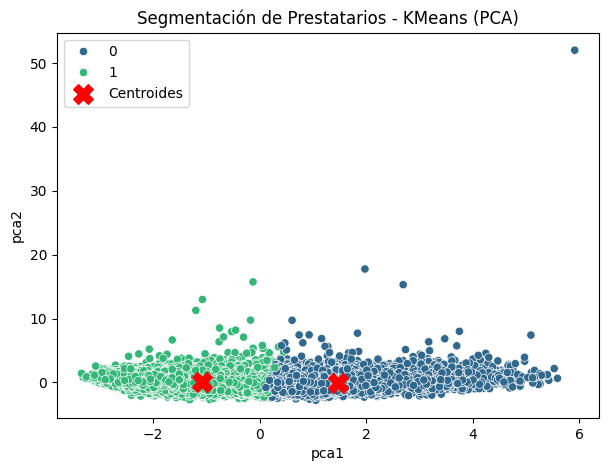

In [86]:
# --- Visualización PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data["pca1"], data["pca2"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(7,5))
centroids_pca = pca.transform(kmeans.cluster_centers_)

sns.scatterplot(data=data, x="pca1", y="pca2", hue="cluster", palette="viridis")
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=200, c="red", marker="X", label="Centroides")
plt.title("Segmentación de Prestatarios - KMeans = 2 (PCA)")
plt.legend()
plt.show()

### **Análisis descriptivo de cada clúster**

In [63]:
# --- Análisis descriptivo de cada clúster ---
summary = data.groupby("cluster")[features].mean().round(2)
print("\nPromedios por clúster:\n", summary)


Promedios por clúster:
          funded_amnt  int_rate  annual_inc    dti  revol_util  grade_code  \
cluster                                                                     
0           13536.41     15.36    76391.66  14.55       67.49        2.83   
1            9231.70      9.66    67125.51  11.86       36.01        0.69   

         purpose_code  
cluster                
0                3.49  
1                4.22  


### **Interpretacion**

#### **Clúster 0 — Prestatarios de Alto Riesgo Crediticio**

**Promedios:**
* funded_amnt: 13,536 (monto medio–alto)
* int_rate: 15.36% (claramente más alto)
* annual_inc: 76,392
* dti: 14.55 (elevado)
* revol_util: 67.49% (muy alto uso del crédito)
* grade_code: 2.83 (mala calificación)
* purpose_code: 3.49

*Este clúster agrupa a los clientes:*
* Con tasas altas
* Peor calificación crediticia
* Alta utilización del crédito
* Mayor endeudamiento relativo (dti alto)
* Monto del préstamo ligeramente más alto
* Son vistos por lending club como riesgo alto, por eso tienen tasas mucho mayores.

#### **Clúster 1 — Prestatarios de Bajo Riesgo Crediticio**

**Promedios:**
* funded_amnt: 9,231 (monto bajo-moderado)
* int_rate: 9.66% (mucho más baja)
* annual_inc: 67,125
* dti: 11.86 (aceptable)
* revol_util: 36% (moderado-bajo)
* grade_code: 0.69 (excelente calificación crediticia)
* purpose_code: 4.22

*Este cluster agrupa los Clientes con:*
* Mejores calificaciones crediticias
* Tasas más bajas
* Mejor manejo de deuda
* Baja utilización del crédito
* Menos riesgo para el prestamista



In [64]:
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette score con k = 2:", sil_score)

print("Inercia con k = 2", kmeans.inertia_)

Silhouette score con k = 2: 0.22888665884688258
Inercia con k = 2 107177.51420878411


## **Interpretación**

#### **Silhouette Score = 0.2289**
* Un valor entre 0.25 y 0.50 indica clústeres moderadamente separados.
* El valor 0.2289 está justo por debajo de 0.25, lo cual sugiere que:
* Los clústeres existen, pero
  * No están bien definidos.
  * Hay cierta superposición entre ellos.

#### **Inercia = 107,177**
* Con k = 2, la inercia es mas alta comparada con el valor anterior.


## **Experimentar con Clusters = 4**

In [89]:
# ---  K-Means = 4 Clusters  ---
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data["cluster"] = clusters

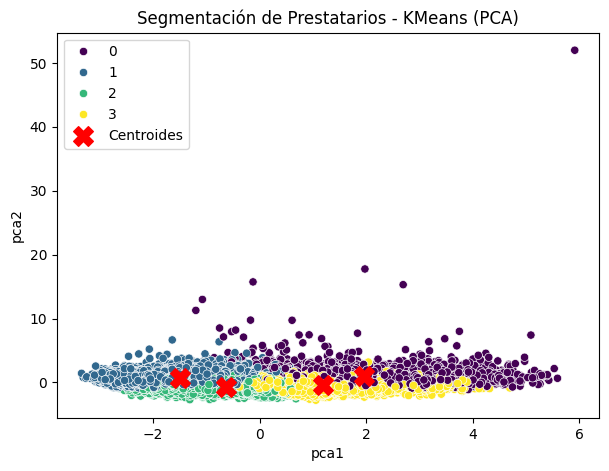

In [90]:
# --- Visualización PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data["pca1"], data["pca2"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(7,5))
centroids_pca = pca.transform(kmeans.cluster_centers_)

sns.scatterplot(data=data, x="pca1", y="pca2", hue="cluster", palette="viridis")
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=200, c="red", marker="X", label="Centroides")
plt.title("Segmentación de Prestatarios - KMeans = 4 (PCA)")
plt.legend()
plt.show()

### **Análisis descriptivo de cada clúster**

In [67]:
# --- Análisis descriptivo de cada clúster ---
summary = data.groupby("cluster")[features].mean().round(2)
print("\nPromedios por clúster:\n", summary)



Promedios por clúster:
          funded_amnt  int_rate  annual_inc    dti  revol_util  grade_code  \
cluster                                                                     
0           22912.00     16.06   117164.25  13.68       58.56        3.11   
1            8817.39      9.49    69985.61   7.29       23.18        0.66   
2            9882.22      9.92    61272.00  16.90       49.31        0.74   
3            8338.16     15.09    58821.70  13.87       70.99        2.74   

         purpose_code  
cluster                
0                3.19  
1                5.92  
2                2.34  
3                4.10  


### **Interpretacion**

#### **Cluster 0 — Clientes de Alto Monto y Tasa Alta (Perfil Riesgoso Premium)**

Características principales:
* funded_amnt muy alto (22,912)
* int_rate alta (16.06%)
* revol_util alta (58.56)
* grade_code malo (3.11)
* ingresos altos → 117k
* purpose_code ≈ 3.19 (frecuentemente consolidación de deudas)

*Interpretación:*  
Personas que piden montos altos, con tasas altas, calificaciones crediticias malas y altos niveles de utilización del crédito.
Riesgo elevado, aunque con ingresos altos.

#### **Cluster 1 — Clientes de Bajo Riesgo (Perfil Premium Estable)**

Características:
* int_rate baja (9.49%)
* revol_util baja (23.18)
* grade_code muy bueno (0.66)
* dti muy bajo (7.29)
* ingreso medio-alto (70k)
* purpose_code 5.92 → fines estables (mejoras del hogar, auto)

*Interpretación:*  
Cliente estable, buen manejo crediticio, buenos ingresos y bajo riesgo.
***Es el mejor clúster del modelo con k = 4.***  


#### **Cluster 2 — Ingresos Medios con Alta Deuda (Riesgo Medio)**

Características:
* dti alto (16.90)
* revol_util moderado-alto (49.31)
* ingresos medios → 61k
* int_rate baja-media (9.92)
* grade_code relativamente bueno (0.74)
* purpose_code = 2.34 (préstamos educativos, auto, etc.)

*Interpretación:*
* Clientes que no son de mal perfil crediticio, pero tienen un alto nivel de endeudamiento respecto al ingreso.
* Riesgo medio, sensibles a sobreendeudamiento.

#### **Cluster 3 — Bajos ingresos, mal Grade y uso extremo del crédito (Riesgo Alto Crítico)**  

Características:
* ingresos bajos → 58k
* int_rate alta (15.09)
* revol_util MUY ALTA (70.99)
* grade_code malo (2.74)
* purpose_code 4.10 (frecuentes consolidaciones de deuda, emergencias)

*Interpretación:*
* Clientes con bajo ingreso, mal score, y consumo crítico de crédito.
* Segmento más riesgoso del modelo


In [68]:
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette score con k = 4:", sil_score)

print("Inercia con k = 4:", kmeans.inertia_)

Silhouette score con k = 4: 0.16016317658599785
Inercia con k = 4: 87274.96305462558


### **Interpretacion**

#### **Silhouette score = 0.1601**
* Un valor de 0.16 es bajo, aunque no es terrible.
* Indica que:
  * los clústeres se separan, pero
  * existe bastante traslape entre grupos.
  * Conclusión: k=4 separa grupos, pero no tan bien.

#### **Inercia = 87,274**
* Comparado con valores de k anteriores:
  * k=2 → 107,177 (peor compactación)
  * k=3 → 95,249
  * k=4 → 87,274 (mejor)

***Una menor inercia = clústeres más compactos, lo cual es bueno.***

------------
------------


# **Optimizacion**

A continuación, hacemos un ciclo para probar diferentes valores de k, y calcular:
* Silhouette Score
* Inercia
* (Opcional) Calinski–Harabasz Index → mide separación entre clústeres (mientras más alto, mejor)
* (Opcional) Davies–Bouldin Score → penaliza clústeres traslapados (mientras más bajo, mejor)

Con estos valores podemos elegir el mejor k sin necesidad de graficar.

**Cómo interpretar los valores para elegir el mejor k**

| Métrica               | ¿Qué valor es mejor?           |
| --------------------- | ------------------------------ |
| **Silhouette Score**  | MÁS ALTO = mejor separación    |
| **Inercia**           | MÁS BAJA = clústeres compactos |
| **Calinski-Harabasz** | MÁS ALTO = mejor estructura    |
| **Davies-Bouldin**    | MÁS BAJO = menos traslape      |


In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

resultados = []

K = range(2, 13)   # Ajustar el rango dependiendo del rango K a probar

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    davies = davies_bouldin_score(X_scaled, labels)

    resultados.append({
        "k": k,
        "inercia": inertia,
        "silhouette": silhouette,
        "calinski_harabasz": calinski,
        "davies_bouldin": davies
    })

df_resultados = pd.DataFrame(resultados)
df_resultados


,k,inercia,silhouette,calinski_harabasz,davies_bouldin
0,2,107177.514209,0.228887,5976.734133,1.637690
1,3,95249.400798,0.168425,4608.712767,1.768509
2,4,87274.963055,0.160163,3959.243747,1.790966
3,5,79227.836664,0.176926,3776.269324,1.482757
4,6,73922.276318,0.169516,3523.356891,1.443108
5,7,70434.197929,0.162344,3245.642096,1.467532
6,8,63244.204495,0.171082,3421.269866,1.359144
7,9,60061.441196,0.166482,3283.908949,1.361398
8,10,57858.149687,0.158190,3114.233486,1.393982
9,11,53470.427326,0.161181,3196.005816,1.277404


In [70]:
# Normalizamos algunas métricas para comparar
df_norm = df_resultados.copy()

# Queremos silhouette ALTO, calinski ALTO, davies BAJO, inertia BAJA
df_norm["rank"] = (
    df_norm["silhouette"].rank(ascending=False) +
    df_norm["calinski_harabasz"].rank(ascending=False) +
    df_norm["davies_bouldin"].rank(ascending=True) +
    df_norm["inercia"].rank(ascending=True)
)

k_optimo = df_norm.sort_values("rank").iloc[0]["k"]
print("K óptimo según combinación de métricas:", k_optimo)


K óptimo según combinación de métricas: 8.0



### **K óptimo según combinación de métricas => 8**

In [104]:
# ---  K-Means = 8 Clusters  ---
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data["cluster"] = clusters

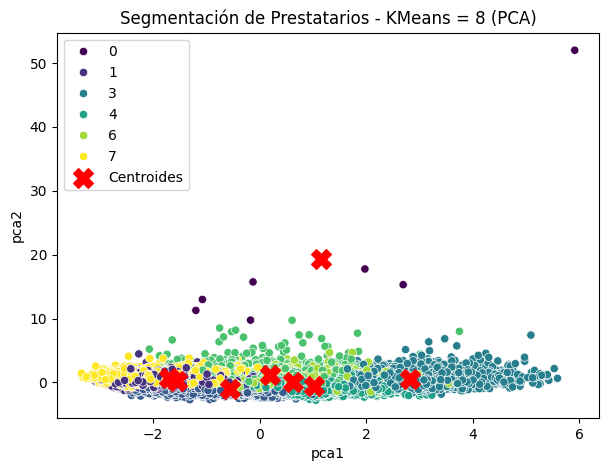

In [105]:
# --- Visualización PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data["pca1"], data["pca2"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(7,5))
centroids_pca = pca.transform(kmeans.cluster_centers_)

sns.scatterplot(data=data, x="pca1", y="pca2", hue="cluster", palette="viridis")
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=200, c="red", marker="X", label="Centroides")
plt.title("Segmentación de Prestatarios - KMeans = 8 (PCA)")
plt.legend()
plt.show()


**En la gráfica PCA solo muestra dos componentes (pca1 y pca2), por lo tanto:**
* Si los clusters 2 y 5 se diferencian principalmente en PC3, PC4, PC5 o PC6, no se separarán bien en el plano PC1-PC2.  
* En otras palabras, en este gráfico están “proyectados” y pueden quedar mezclados con otros clusters.

### **Análisis descriptivo de cada clúster**

In [106]:
# --- Análisis descriptivo de cada clúster ---
summary = data.groupby("cluster")[features].mean().round(2)
print("\nPromedios por clúster:\n", summary)



Promedios por clúster:
          funded_amnt  int_rate  annual_inc    dti  revol_util  grade_code  \
cluster                                                                     
0            7910.71      9.73  2223112.00   1.71       44.66        0.86   
1            8128.77      8.72    66947.64   7.91       27.98        0.44   
2            9147.69      9.99    56182.34  19.67       50.25        0.76   
3           20858.97     18.12    93363.58  15.31       69.99        4.06   
4            8858.46     14.43    60026.49  13.45       70.97        2.43   
5           21931.49     12.04   116167.46  11.12       38.34        1.40   
6            7754.22     14.32    63919.47  13.20       63.54        2.39   
7            7644.54      9.20    61928.09   9.00       22.33        0.56   

         purpose_code  
cluster                
0                3.71  
1                2.00  
2                2.25  
3                2.76  
4                1.91  
5                2.95  
6           

### **Interpretacion**

#### **Cluster 0 — Caso Atípico con Ingreso Extremadamente Alto**
Características:  
* annual_inc = 2,223,112 → ¡extremo! (posiblemente outlier)
* dti muy bajo (1.71) → mínimo riesgo
* funded_amnt moderado (7,910)
* Buena calificación crediticia (0.86)
* tasas moderadas (9.73)

**Interpretación:**  
* Este clúster captura personas con ingresos extraordinariamente altos.
* Es un grupo atípico, pequeño y extremadamente solvente.
Podrían ser directores, ejecutivos, dueños de empresa.
* Útil para separar outliers, no debe mezclarse con otros.

#### **Cluster 1 — Perfil Premium Estable (Muy Bajo Riesgo)**

Características:  
* int_rate baja (8.72)
* revol_util baja (27.98)
* dti bajo (7.91)
* grade_code muy bueno (0.44)
* ingresos medios-altos (66,947)
* propósito ≈ 2 (educación, auto, mejoras)

**Interpretación:**
* Clientes con muy buen historial, baja utilización, alta solvencia.
* Es el grupo más saludable financieramente.

#### **Cluster 2 — Ingresos Bajos con Deuda Alta (Riesgo Medio-Alto)**

Características:
* dti muy alto (19.67)
* revol_util medio (50.25)
* ingresos bajos (56,182)
* tasas bajas-medias (9.99)
* credit scoring relativamente bueno (0.76)

**Interpretación:**
* Clientes que parecieran buenos en score pero tienen demasiada deuda respecto a su ingreso.
* Riesgo medio-alto, potencial sobreendeudamiento.

#### **Cluster 3 — Alto Monto + Alta Tasa + Utilización Máxima (Riesgo Muy Alto)**  

Características:
funded_amnt muy alto (20,858)
int_rate altísima (18.12)
revol_util altísima (69.99)
grade_code malo (4.06)
dti alto (15.31)
ingresos buenos pero no compensan el riesgo (93,363)

Interpretación:
Clientes de alto riesgo crediticio, tasas muy altas, alto uso del crédito y mal score.
Segmento con probabilidad alta de impago.

#### **Cluster 4 — Ingresos Bajos, Int. Alta, Mal Score (Riesgo Alto)**  

Características:  
* int_rate alta (14.43)
* revol_util altísima (70.97)
* income bajo (60,026)
* grade_code malo (2.43)

**Interpretación:**  
* Perfil muy riesgoso como el clúster 3, pero con montos más pequeños.
* Clientes financieramente vulnerables.

#### **Cluster 5 — Alto Monto, Buen Ingreso y Riesgo Bajo-Medio**

Características:
* funded_amnt alto (21,931)
* annual_inc alto (116,167)
* dti saludable (11.12)
* revol_util moderado (38.34)
* grade_code aceptable (1.40)

**Interpretación:**
* Personas con mayor capacidad económica y un uso moderado del crédito.
* Riesgo bajo-medio. Clientes valiosos.

#### **Cluster 6 — Baja Capacidad y Uso Muy Alto del Crédito (Riesgo Muy Alto)**

Características:
* ingresos modestos (63,919)
* int_rate alta (14.32)
* revol_util muy alta (63.54)
* grade_code malo (2.39)
* dti alto (13.20)
* purpose_code 9.56 → préstamos relacionados a "vacation", "small business", "medical" u otros riesgosos.

**Interpretación:**
* Clientes financieramente complicados y con mal comportamiento crediticio.
* Similar a cluster 4, pero peor en propósito del préstamo.

#### **Cluster 7 — Buen Score, Baja Utilización y Baja Tasa (Bajo Riesgo)**

Características:
* int_rate baja (9.20)
* revol_util muy baja (22.33)
* grade_code muy buena (0.56)
* income moderado (61,928)
* dti moderado-bajo (9.00)
* purpose_code ≈ 9 → posiblemente préstamos para "small business" o "education" según codificación.

**Interpretación:**
* Clientes con buen score y buena gestión crediticia.
Riesgo bajo.

**Tabla Resumen**

| Cluster | Riesgo              | Características clave                           |
| ------- | ------------------- | ----------------------------------------------- |
| **0**   | Muy bajo (outliers) | Ingresos extremadamente altos                   |
| **1**   | Muy bajo            | Excelente score, bajo uso, buena solvencia      |
| **2**   | Medio-alto          | Mucha deuda vs ingreso                          |
| **3**   | Muy alto            | Alto monto, alta tasa, alto uso, mal score      |
| **4**   | Alto                | Baja capacidad, alta tasa, mal score            |
| **5**   | Bajo-medio          | Montos altos, ingresos altos, buen control      |
| **6**   | Muy alto            | Alto uso, alto riesgo, propósitos muy riesgosos |
| **7**   | Bajo                | Buen score y bajo uso del crédito               |


In [107]:
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette score con k = 8:", sil_score)

print("Inercia con k = 8:", kmeans.inertia_)

Silhouette score con k = 8: 0.17108191207612905
Inercia con k = 8: 63244.20449486821


### **Interpretacion**

#### **Silhouette Score = 0.1710**
* Es bajo, pero es normal en datasets reales con clústeres que se traslapan como LendingClub.
* No es peor que k=4 (≈0.16).
* Clústeres con traslape moderado, pero la estructura existe.

#### **2. Inercia = 63,244**
Es mucho menor que:
* k=2 → 107,177 (peor compactación)
* k=3 → 95,249
* k=4 → 87,274
* **k=5 → 63,244** ¡Excelente!





# **INTERPETACION GENERAL**

| k     | Silhouette Score ↑ | Inercia ↓ |
| ----- | ------------------ | --------- |
| **2** | **0.2289**         | 107,177   |
| **3** | 0.1684             | 95,249    |
| **4** | 0.1601             | 87,274    |
| **8** | 0.1711             | 63,244    |

#### **Silhouette Score**

* Los valores son todos algo bajos → los clústeres no están muy bien definidos.
* El mejor valor lo tiene k = 2 (0.2289).

**La mejor opción de las 4 pruebas es: k = 2**  
* ¿Por qué?:
  * Tiene el mejor Silhouette Score (el métrico más importante).
  * La inercia es razonable.
  * A partir de k > 2, la separación entre clústeres empeora (Silhouette más bajo), aunque la inercia mejore.

**Conclusión**  

* Tras evaluar diferentes valores de k, **se determinó que k = 2 es el número óptimo de clústeres**, debido a que obtuvo el mayor Silhouette Score (0.2289), lo cual **indica la mejor separación relativa entre grupos**.
* Aunque la inercia disminuye al aumentar k, esta reducción no compensa la pérdida de calidad en la cohesión y separación de los clústeres.   
